In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 2. Load the dataset

In [ ]:
Sp = pd.read_csv(r"/content/Mall_Customers.csv")
Sp.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations

# a) Univariate Analysis


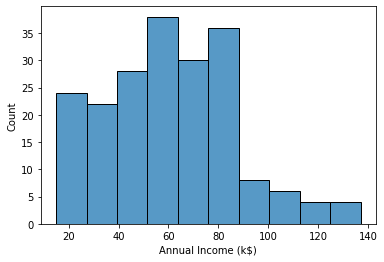

In [ ]:
sns.histplot(Sp['Annual Income (k$)'])

# b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


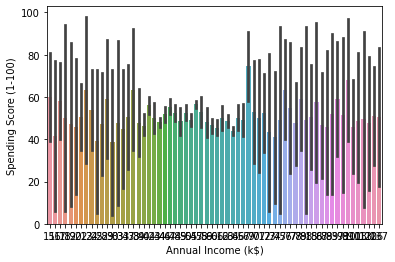

In [ ]:
sns.barplot(Sp['Annual Income (k$)'],Sp['Spending Score (1-100)'])

# c)Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


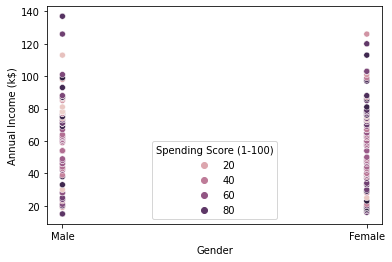

In [ ]:
sns.scatterplot(Sp['Gender'],Sp['Annual Income (k$)'],Sp['Spending Score (1-100)'])

# 4. Perform descriptive statistics on the dataset

In [ ]:
Sp.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
Sp.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
Sp.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [ ]:
Sp.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


# 5. Check for Missing values and deal with them.


In [14]:
Sp.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Find the outliers and replace them outliers

In [77]:
q = Sp.quantile([0.95,0.75])
q

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0.95,190.05,1.0,66.05,7.0,92.0
0.75,150.25,1.0,49.00,7.0,73.0


In [78]:
iqr = q.iloc[0]-q.iloc[1]
iqr

CustomerID                39.80
Gender                     0.00
Age                       17.05
Annual Income (k$)         0.00
Spending Score (1-100)    19.00
dtype: float64

In [79]:
P = q.iloc[0]+(1.5*iqr)
P

CustomerID                249.750
Gender                      1.000
Age                        91.625
Annual Income (k$)          7.000
Spending Score (1-100)    120.500
dtype: float64

In [80]:
X = q.iloc[1]-(1.5*iqr)
X

CustomerID                90.550
Gender                     1.000
Age                       23.425
Annual Income (k$)         7.000
Spending Score (1-100)    44.500
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


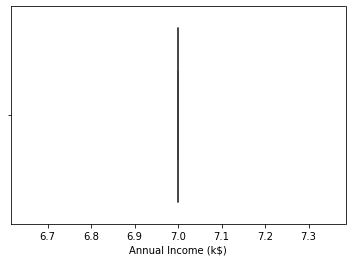

In [81]:
Sp['Annual Income (k$)']=np.where(Sp['Annual Income (k$)']>10,7,Sp['Annual Income (k$)'])
sns.boxplot(Sp['Annual Income (k$)'])

# 7. Check for Categorical columns and perform encoding.

In [82]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Le = LabelEncoder()
OHE = OneHotEncoder()
Sp['Gender']=Le.fit_transform(Sp['Gender'])
Sp.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,7,39
1,2,1,21,7,81
2,3,0,20,7,6
3,4,0,23,7,77
4,5,0,31,7,40


# 8. Scaling the data

In [83]:
X = Sp.drop('Spending Score (1-100)',axis=1)
Y = Sp['Spending Score (1-100)']
X

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,7
1,2,1,21,7
2,3,0,20,7
3,4,0,23,7
4,5,0,31,7
...,...,...,...,...
195,196,0,35,7
196,197,0,45,7
197,198,1,32,7
198,199,1,32,7


In [84]:
Y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [85]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mm =MinMaxScaler()
X_scale=mm.fit_transform(X)
X_scale

array([[0.        , 1.        , 0.01923077, 0.        ],
       [0.00502513, 1.        , 0.05769231, 0.        ],
       [0.01005025, 0.        , 0.03846154, 0.        ],
       [0.01507538, 0.        , 0.09615385, 0.        ],
       [0.0201005 , 0.        , 0.25      , 0.        ],
       [0.02512563, 0.        , 0.07692308, 0.        ],
       [0.03015075, 0.        , 0.32692308, 0.        ],
       [0.03517588, 0.        , 0.09615385, 0.        ],
       [0.04020101, 1.        , 0.88461538, 0.        ],
       [0.04522613, 0.        , 0.23076923, 0.        ],
       [0.05025126, 1.        , 0.94230769, 0.        ],
       [0.05527638, 0.        , 0.32692308, 0.        ],
       [0.06030151, 0.        , 0.76923077, 0.        ],
       [0.06532663, 0.        , 0.11538462, 0.        ],
       [0.07035176, 1.        , 0.36538462, 0.        ],
       [0.07537688, 1.        , 0.07692308, 0.        ],
       [0.08040201, 0.        , 0.32692308, 0.        ],
       [0.08542714, 1.        ,

# 9. Perform any of the clustering algorithms


In [86]:
from sklearn.cluster import KMeans
Km=KMeans()
clus = Km.fit_predict(X_scale)
clus

array([4, 4, 3, 3, 3, 3, 3, 3, 6, 3, 6, 3, 5, 3, 4, 4, 3, 4, 6, 3, 4, 4,
       5, 4, 5, 4, 5, 4, 3, 3, 6, 3, 6, 4, 5, 3, 3, 3, 3, 3, 5, 4, 6, 3,
       5, 3, 5, 3, 3, 3, 5, 4, 3, 6, 5, 6, 5, 6, 3, 6, 6, 4, 5, 5, 6, 4,
       5, 5, 4, 3, 6, 5, 5, 5, 6, 4, 5, 2, 7, 5, 6, 2, 6, 5, 7, 2, 5, 7,
       7, 5, 5, 4, 2, 5, 7, 4, 5, 7, 2, 4, 7, 5, 6, 4, 2, 7, 5, 2, 6, 6,
       6, 7, 7, 0, 7, 7, 5, 5, 5, 5, 0, 1, 1, 2, 7, 7, 2, 2, 2, 2, 2, 2,
       7, 7, 0, 7, 1, 0, 0, 1, 5, 0, 7, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

# 10. Add the cluster data with the primary dataset

In [87]:
Sp.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [88]:
Sp1 = pd.DataFrame(X_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
Sp1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0


In [89]:
Sp1['Cluster']=pd.Series(clus)
Sp1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.019231,0.0,4
1,0.005025,1.0,0.057692,0.0,4
2,0.010050,0.0,0.038462,0.0,3
3,0.015075,0.0,0.096154,0.0,3
4,0.020101,0.0,0.250000,0.0,3


# 11. Split the data into dependent and independent variables.

In [90]:
x = Sp1.iloc[:,0:4]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0
...,...,...,...,...
195,0.979899,0.0,0.326923,0.0
196,0.984925,0.0,0.519231,0.0
197,0.989950,1.0,0.269231,0.0
198,0.994975,1.0,0.269231,0.0


In [91]:
y = Sp1['Cluster']
y

0      4
1      4
2      3
3      3
4      3
      ..
195    1
196    1
197    0
198    0
199    0
Name: Cluster, Length: 200, dtype: int32

# 12. Split the data into training and testing

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=1)

# 13. Build the Model

# 14. Train the Model

In [93]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

# 15. Test the Model

In [94]:
predict_test=LR.predict(X_test)
predict_test

array([42, 42, 42, 55, 42, 55, 55, 42, 42, 42, 55, 55, 42, 42, 55, 42, 42,
       42, 42, 55, 55, 42, 42, 42, 42, 55, 42, 42, 42, 55, 42, 42, 42, 55,
       55, 42, 42, 42, 42, 55, 55, 55, 42, 55, 42, 42, 42, 42, 55, 42, 55,
       55, 42, 55, 55, 55, 42, 42, 55, 55])

In [96]:
Y_test

58     51
40     35
34     14
102    59
184    39
198    18
95     52
4      40
29     87
168    27
171    75
18     29
11     99
89     46
110    52
118    43
159    73
35     81
136     7
59     46
51     60
16     35
44     28
94     42
31     73
162     5
38     26
28     31
193    91
27     61
47     47
165    75
194    16
177    69
176    15
97     50
174    13
73     56
69     47
172    10
108    43
107    46
189    85
14     13
56     50
19     98
114    48
39     75
185    97
124    29
98     42
123    91
119    57
53     60
33     92
179    90
181    86
106    50
199    83
138    10
Name: Spending Score (1-100), dtype: int64

# 16. Measure the performance using Evaluation Metrics.

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_test,Y_test)

0.016666666666666666

In [98]:
from sklearn.naive_bayes import CategoricalNB
NB = CategoricalNB()
NB.fit(X_train,Y_train)

CategoricalNB()

In [99]:
pred_test=NB.predict(X_test)
pred_test

array([42, 42, 42, 55, 42, 55, 55, 42, 42, 42, 55, 55, 42, 42, 55, 42, 42,
       42, 42, 55, 55, 42, 42, 42, 42, 55, 42, 42, 42, 55, 42, 42, 42, 55,
       55, 42, 42, 42, 42, 55, 55, 55, 42, 55, 42, 42, 42, 42, 55, 42, 55,
       55, 42, 55, 55, 55, 42, 42, 55, 55])

In [100]:
Y_test

58     51
40     35
34     14
102    59
184    39
198    18
95     52
4      40
29     87
168    27
171    75
18     29
11     99
89     46
110    52
118    43
159    73
35     81
136     7
59     46
51     60
16     35
44     28
94     42
31     73
162     5
38     26
28     31
193    91
27     61
47     47
165    75
194    16
177    69
176    15
97     50
174    13
73     56
69     47
172    10
108    43
107    46
189    85
14     13
56     50
19     98
114    48
39     75
185    97
124    29
98     42
123    91
119    57
53     60
33     92
179    90
181    86
106    50
199    83
138    10
Name: Spending Score (1-100), dtype: int64

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,Y_test)

0.016666666666666666

In [102]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [103]:
pre_test=DTC.predict(X_test)
pre_test

array([54,  4,  5, 55, 17, 74, 49, 77, 73, 32, 68, 14, 72, 42, 48, 59, 78,
       73, 35, 56, 41, 72,  5, 41, 73,  5, 73, 17, 32, 73, 42, 76, 28, 89,
       14, 41, 24, 49, 52, 92, 48, 56, 32, 79, 45, 72, 50, 73, 86, 77, 49,
       56, 59, 41, 73, 92, 69, 43, 86,  5])

In [104]:
Y_test

58     51
40     35
34     14
102    59
184    39
198    18
95     52
4      40
29     87
168    27
171    75
18     29
11     99
89     46
110    52
118    43
159    73
35     81
136     7
59     46
51     60
16     35
44     28
94     42
31     73
162     5
38     26
28     31
193    91
27     61
47     47
165    75
194    16
177    69
176    15
97     50
174    13
73     56
69     47
172    10
108    43
107    46
189    85
14     13
56     50
19     98
114    48
39     75
185    97
124    29
98     42
123    91
119    57
53     60
33     92
179    90
181    86
106    50
199    83
138    10
Name: Spending Score (1-100), dtype: int64

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(pre_test,Y_test)

0.03333333333333333